In [72]:
import numpy as np
from matplotlib.pyplot import plot
from matplotlib.pyplot import show

In [73]:
c_a = np.loadtxt('apple.csv', usecols=(4,), skiprows=1, unpack=True, delimiter=',')
c_r = np.loadtxt('Rel.csv', usecols=(9), skiprows=1, unpack=True, delimiter=',')
c_a = c_a[:30]
c_r = c_r[:30]
c_a, c_r, len(c_a) == len(c_r)

(array([214.01 , 214.38 , 210.97 , 210.58 , 211.98 , 210.11 , 207.72 ,
        210.65 , 209.43 , 205.93 , 215.04 , 211.725, 208.072, 197.75 ,
        203.075, 205.94 , 207.884, 199.29 , 192.063, 194.73 , 195.86 ,
        199.23 , 192.05 , 195.46 , 194.12 , 196.19 , 195.116, 198.67 ,
        200.38 , 203.4  ]),
 array([205.26, 204.13, 207.04, 202.47, 202.05, 197.57, 186.15, 186.24,
        185.82, 188.95, 186.15, 185.71, 181.66, 174.42, 171.23, 173.8 ,
        170.68, 161.39, 157.11, 160.64, 174.76, 179.43, 180.21, 196.45,
        216.42, 218.04, 201.29, 214.12, 233.49, 228.02]),
 True)

In [74]:
# cov函数计算股票收益率的协方差矩阵
covariance = np.cov(c_a, c_r)
covariance

array([[ 54.53575221,  21.80819057],
       [ 21.80819057, 386.36782299]])

In [75]:
# diagonal函数查看对角线上的元素
covariance.diagonal()

array([ 54.53575221, 386.36782299])

In [76]:
# trace函数计算矩阵的迹，即对角线上元素之和
covariance.trace()

440.90357520114947

In [77]:
# 两个向量的相关系数被定义为协方差除以各自标准差的乘积,相关系数矩阵
covariance/ (c_a.std() * c_r.std())

array([[0.38865426, 0.15541816],
       [0.15541816, 2.7534873 ]])

In [78]:
# corrcoef函数计算相关系数
np.corrcoef(c_a, c_r)

array([[1.        , 0.15023755],
       [0.15023755, 1.        ]])

In [79]:
# 判断两只股票的价格走势是否同步。
# 如果它们的差值偏离了平均差值2倍于标准差的距离，则认为这两只股票走势不同步。
difference = c_a - c_r
avg = np.mean(difference) 
dev = np.std(difference)
np.abs(difference[-1] - avg) > 2 * dev

False

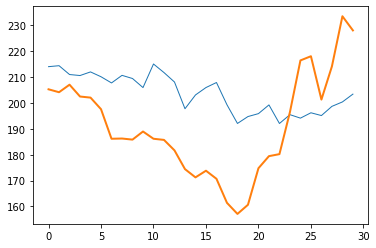

In [80]:
t = np.arange(len(c_a))

plot(t, c_a, lw=1)
plot(t, c_r, lw=2)
show()

In [81]:
# 多项式拟合
poly = np.polyfit(t, c_a-c_r, 4)
print(poly)

# polyval函数推断下一个值
np.polyval(poly, t[-1] + 1)

[ 1.13150075e-03 -7.08461672e-02  1.20854110e+00 -4.49092502e+00
  1.16812009e+01]


-31.69046517339565

In [82]:
# roots函数找出我们拟合的多项式函数什么时候到达0值
np.roots(poly)

array([35.31848456+0.j        , 23.37561058+0.j        ,
        1.95923627+2.94379524j,  1.95923627-2.94379524j])

In [83]:
# polyder函数对多项式函数求导
np.polyder(poly)

array([ 0.004526  , -0.2125385 ,  2.41708221, -4.49092502])

In [84]:
# 求出导数函数的根，即找出原多项式函数的极值点
np.roots(np.polyder(poly))

array([30.53314721, 14.12568512,  2.30059343])

In [85]:
vals = np.polyval(poly, t)
np.argmax(vals), np.argmin(vals)

(14, 29)

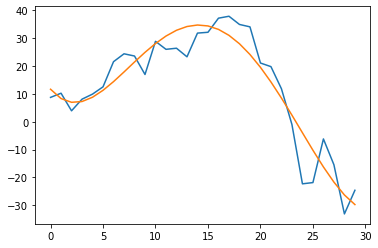

In [86]:
plot(t, c_a-c_r)
plot(t, vals)
show()

In [87]:
# 计算OBV
#  sign函数和piecewise函数

# 收盘价和成交量
c, v = np.loadtxt('apple.csv', delimiter=',', usecols=(4, 5 ), unpack=True, skiprows=1)
c = c[:30]
v = v[:30]

# 计算数组中两个连续元素的差值
change = np.diff(c)
print(change)

# sign函数可以返回数组中每个元素的正负符号
# 数组元素为负时返回-1,正时返回1，否则返回0。
signs = np.sign(change)
print(signs)

# piecewise函数来获取数组元素的正负,可以分段给定取值
pieces = np.piecewise(change, [change<0, change>0], [-1, 1])
print(np.array_equal(signs, pieces))

# OBV值的计算依赖于前一日的收盘价
v[1:] * signs

[  0.37   -3.41   -0.39    1.4    -1.87   -2.39    2.93   -1.22   -3.5
   9.11   -3.315  -3.653 -10.322   5.325   2.865   1.944  -8.594  -7.227
   2.667   1.13    3.37   -7.18    3.41   -1.34    2.07   -1.074   3.554
   1.71    3.02 ]
[ 1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.]
True


array([ 21496600., -19720000., -17040400.,  15986100., -16508200.,
       -21230700.,  21639000., -15460500., -21216700.,  26071700.,
       -21862600., -21719800., -31491700.,  38060700.,  66682500.,
        61520300., -41910800., -44498300.,  26781300.,  24940800.,
        21976000., -27059000.,  30368100., -17081100.,  22603100.,
       -13227200.,  19655200.,  23409600.,  19419200.])

In [88]:
# 交易过程模拟
# 减少循环

o, h, l, c = np.loadtxt('apple.csv', delimiter=',', usecols=(1, 2, 3, 4), skiprows = 1, unpack=True)
o, h, l, c = o[:30], h[:30], l[:30], c[:30]

def calc_profit(open, high, low, close): 
    # 以比开盘价稍低的价格买入
    buy = open * float(0.9973) 
     # daily range 
    if low < buy < high : 
        return (close - buy)/buy 
    else: 
        return 0 
    
# vectorize函数相当于Python中的map函数
#调用vectorize函数并给定calc_profit函数作为参数
func = np.vectorize(calc_profit)

profits = func(o, h, l, c)

real_trades = profits[profits != 0]
print(real_trades)
print(round(np.mean(real_trades) * 100, 2))

winning_trades = profits[profits>0]
print(round(np.mean(winning_trades) * 100, 2))

losing_trades = profits[profits < 0]
print( round(np.mean(losing_trades) * 100, 2))

[ 0.00543219  0.00167937 -0.01324209 -0.00283303  0.01071753 -0.00996789
 -0.00433882  0.01611726 -0.00053785 -0.02106141  0.03500302 -0.01215297
 -0.01624238 -0.04108052  0.00550485  0.00265862  0.00771963 -0.02488879
 -0.04225694  0.01500855  0.0024514   0.02356601 -0.02114604  0.01746487
 -0.0053373   0.00153318 -0.00125458  0.02220783  0.01419661]
-0.12
1.21
-1.55


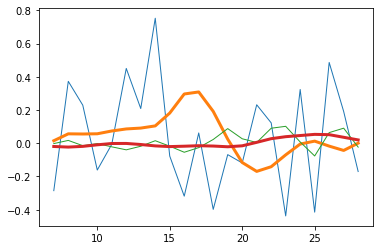

[ True False False  True False False False False]
[28.02326888  0.          0.         19.5136148   0.          0.
  0.          0.        ]


array([28.02326888,  0.        ,  0.        , 19.5136148 ])

In [89]:
# 数据平滑

# 使用 hanning 函数平滑数据
# 调用hanning函数计算权重，生成一个长度为N的窗口
N = 8
weights = np.hanning(N)

# 使用convolve函数计算BHP和VALE的股票收益率，以归一化处理后的weights作为参数
bhp = np.loadtxt('apple.csv', delimiter=',', usecols=(5,),unpack=True, skiprows=1) 
bhp = bhp[:30]
bhp_returns = np.diff(bhp) / bhp[ : -1]
smooth_bhp = np.convolve(weights/weights.sum(), bhp_returns) [N-1:-N+1]

vale = np.loadtxt('Rel.csv', delimiter=',', usecols=(9,),unpack=True, skiprows=1) 
vale = vale[:30]
vale_returns = np.diff(vale) / vale[ : -1] 
smooth_vale = np.convolve(weights/weights.sum(), vale_returns) [N-1:-N+1]

t = np.arange(N - 1, len(bhp_returns)) 
plot(t, bhp_returns[N-1:], lw=1.0) 
plot(t, smooth_bhp, lw=3.0) 
plot(t, vale_returns[N-1:], lw=1.0) 
plot(t, smooth_vale, lw=3.0) 
show()

# 多项式拟合平滑后的数据
K = 8
t = np.arange(N - 1, len(bhp_returns)) 
poly_bhp = np.polyfit(t, smooth_bhp, K) 
poly_vale = np.polyfit(t, smooth_vale, K)

# 于先对两个多项式函数作差，然后对所得的多项式函数求根, 找交叉点
poly_sub = np.polysub(poly_bhp, poly_vale) 
xpoints = np.roots(poly_sub)

# 是否为实数
reals = np.isreal(xpoints)
print(reals)

# select函数可以根据一组给定的条件，从一组元素中挑选出符合条件的元素并返回数组
xpoints = np.select([reals], [xpoints]) 
xpoints = xpoints.real
print(xpoints)
# trim_zeros函数可以去掉一维数组中开头和末尾为0的元素
np.trim_zeros(xpoints)